In [13]:
GEX_Cohort='GEX_CCG1112_LowMt'
REPO = '../..'
WORKFLOW_DATA = f'{REPO}/data/workflow'
EXTERNAL_DATA = f'{REPO}/data/external'
RESULT_DATA = f'{REPO}/data/result/cleaned_files/'
FIGURE_FOLDER=f'{REPO}/ata/result/cleaned_figures'
Manuscript_RESULT = f'{REPO}/data/result/manuscript_table/'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import commentjson
sys.path.append(REPO)
from settings import COLOR_PAlETTE
from scipy.stats import ranksums
from utils.visual import *
with open(f'{RESULT_DATA}/ColorMap.json','r') as f:
    colormap = commentjson.load(f)
COLOR_PAlETTE.update(colormap)
import warnings
warnings.filterwarnings("ignore")
plt.style.use(f'{REPO}/paper.mplstyle')
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
compartment_col = 'Compartment'
lineage_col = 'Lineage'
celltype_col='Celltype'
cellstate_col = 'Cellstate'
ordered_compartment = ['Immune','Stromal','Epithelial']
ordered_lineage = ['T','B','Plasma','Myeloid','Immune','CAF','Pericyte','Adipocytes','Endothelial','SMC','Stromal','Epithelial','Tumor']
celltype_list = ['CD8T','Macs','Tumor'] # 'Endothelial','CAF', for analyze the relative abundance of difference cell states in each cell type
obs_path = f'{REPO}/data/result/manuscript_table/GEX_OBS.csv'

# Compartment distribution

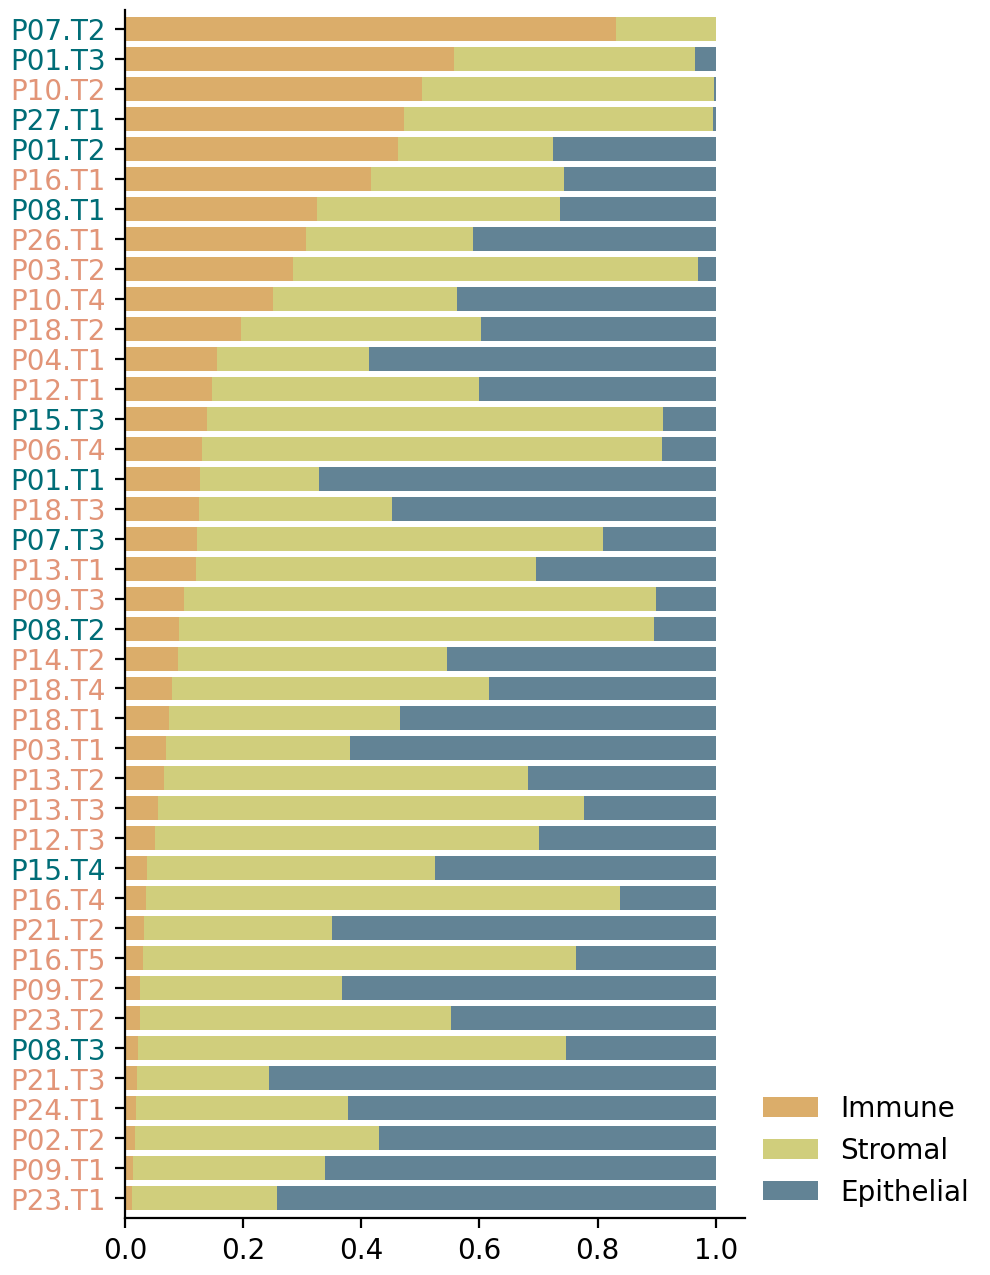

In [23]:
obs = pd.read_csv(obs_path,index_col=0)
obs['BestResponseV'] = obs.BestResponse.map({'0-I':'favorable response\n(RCB 0-I)','II-III':'unfavorable response\n(RCB II-III)'})
pt_bp_map = obs.drop_duplicates(subset=['Sample_Short']).set_index('Sample_Short')['BestResponse'].to_dict()
pt_bpV_map = obs.drop_duplicates(subset=['Sample_Short']).set_index('Sample_Short')['BestResponseV'].to_dict()
pt_rcb_map = obs.drop_duplicates(subset=['Sample_Short']).set_index('Sample_Short')['RCB'].to_dict()
pt_time_map = obs.drop_duplicates(subset=['Sample_Short']).set_index('Sample_Short')['Timepoint'].to_dict()

# compartment percentage
pct = (pd.crosstab(obs[compartment_col],obs['Sample_Short']) / obs['Sample_Short'].value_counts()).T.sort_values(ordered_compartment)
pct = pct[ordered_compartment+[ x for x in pct.columns if not x in ordered_compartment ]]

fig,ax = plt.subplots(1,1,figsize=(4,8),dpi=200)
ax = pct.plot(kind='barh',stacked=True,color=COLOR_PAlETTE[compartment_col],width=.8,ax=ax)
ax.legend(loc=(1.01,0),frameon=False)
ax.set(ylabel='')
# ax.spines[['right','top','left']].set_visible(False)
for handle in ax.get_yticklabels():
    pt = handle.get_text()
    handle.set_color(COLOR_PAlETTE['BestResponse'][pt_bpV_map[pt]])

In [24]:
f"{obs.shape[0]:,}"

'249,379'

In [25]:
stats_result = pct.loc[pct.index.map(pt_time_map)=='Baseline',:].apply(lambda v: pd.Series(ranksums(v[v.index.map(pt_bp_map)=='0-I'], 
                                                         v[v.index.map(pt_bp_map)=='II-III']),
                                                index=['statstics','Pvalue'],name=v.name)
                            ,axis=0).T
stats_result 

,statstics,Pvalue
Compartment,,
Immune,1.571651,0.116032
Stromal,0.277350,0.781511
Epithelial,-0.832050,0.405381


# Lineage distribution

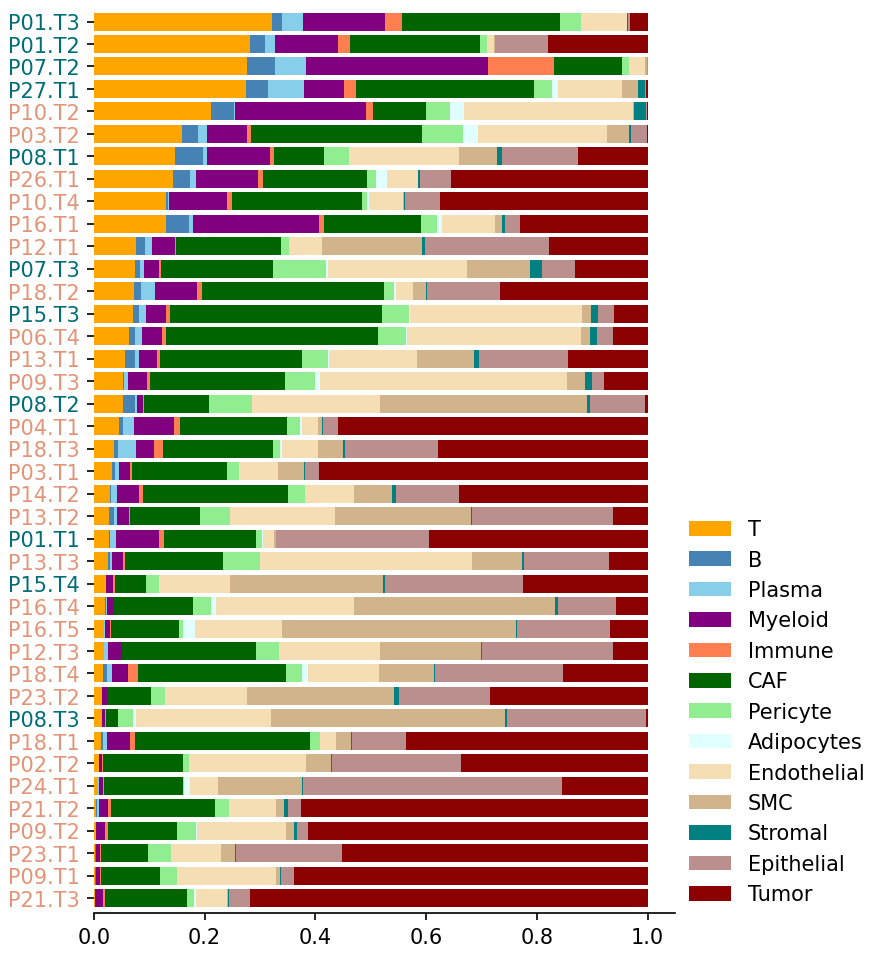

In [28]:
# lineage percentage
pct = (pd.crosstab(obs[lineage_col],obs['Sample_Short']) / obs['Sample_Short'].value_counts()).T.sort_values(ordered_lineage)
pct = pct[ordered_lineage+[ x for x in pct.columns if not x in ordered_lineage ]]

fig,ax = plt.subplots(1,1,figsize=(5,8),dpi=150)
ax = pct.plot(kind='barh',stacked=True,color=COLOR_PAlETTE[lineage_col],width=.8,ax=ax)
ax.legend(loc=(1.01,0),frameon=False)
ax.set(ylabel='')
ax.spines[['right','top','left']].set_visible(False)
for handle in ax.get_yticklabels():
    pt = handle.get_text()
    handle.set_color(COLOR_PAlETTE['BestResponse'][pt_bpV_map[pt]])

In [29]:
stats_result = pct.loc[pct.index.map(pt_time_map)=='Baseline',:].apply(lambda v: pd.Series(ranksums(v[v.index.map(pt_bp_map)=='0-I'], 
                                                         v[v.index.map(pt_bp_map)=='II-III']),
                                                index=['statstics','Pvalue'],name=v.name)
                            ,axis=0).T
stats_result 

,statstics,Pvalue
Lineage,,
T,1.386750,0.165518
B,1.016950,0.309177
Plasma,0.647150,0.517535
Myeloid,1.571651,0.116032
Immune,1.571651,0.116032
CAF,-0.277350,0.781511
Pericyte,0.277350,0.781511
Adipocytes,1.016950,0.309177
Endothelial,0.462250,0.643902


## CD8 T cells in T cells

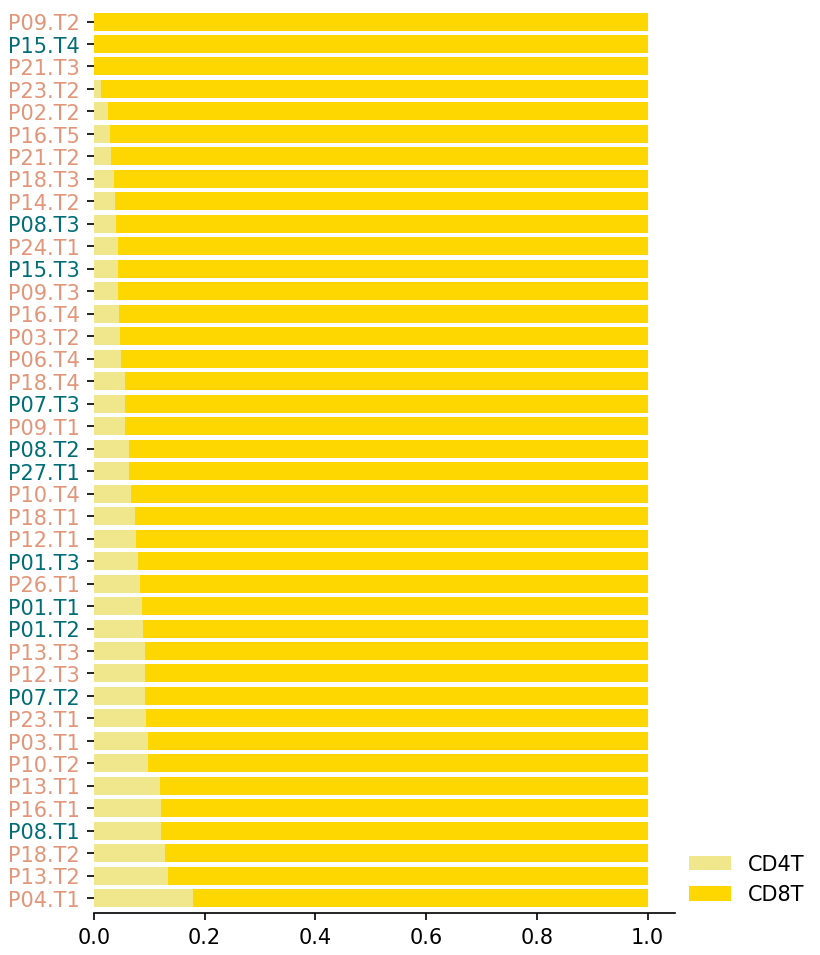

In [31]:
# lineage percentage
pct = (pd.crosstab([obs[lineage_col],obs[celltype_col]],[obs[lineage_col],obs['Sample_Short']]) / obs.groupby([lineage_col])['Sample_Short'].value_counts()).T
pct = pct.loc['T','T'].sort_values('CD8T')
fig,ax = plt.subplots(1,1,figsize=(5,8),dpi=150)
ax = pct.plot(kind='barh',stacked=True,color=COLOR_PAlETTE[celltype_col],width=.8,ax=ax)
ax.legend(loc=(1.01,0),frameon=False)
ax.set(ylabel='')
ax.spines[['right','top','left']].set_visible(False)
for handle in ax.get_yticklabels():
    pt = handle.get_text()
    handle.set_color(COLOR_PAlETTE['BestResponse'][pt_bpV_map[pt]])

# Cell states preditive power test on baseline samples

,statstics,Pvalue,Comparision
Cellstate,,,
Tumor.EMT-III,2.311251,0.020819,0-I - II-III
Tumor.ER-I,-1.941451,0.052204,0-I - II-III
Macs.Interferon,1.756551,0.078994,0-I - II-III
CD8T.Dysfunction,1.571651,0.116032,0-I - II-III
Macs.Adhesion,-1.386750,0.165518,0-I - II-III
Tumor.ER-II,-1.016950,0.309177,0-I - II-III
Macs.Presentation,0.832050,0.405381,0-I - II-III
Tumor.EMT-II,-0.832050,0.405381,0-I - II-III
Tumor.Cell_Cycle,-0.739600,0.459543,0-I - II-III


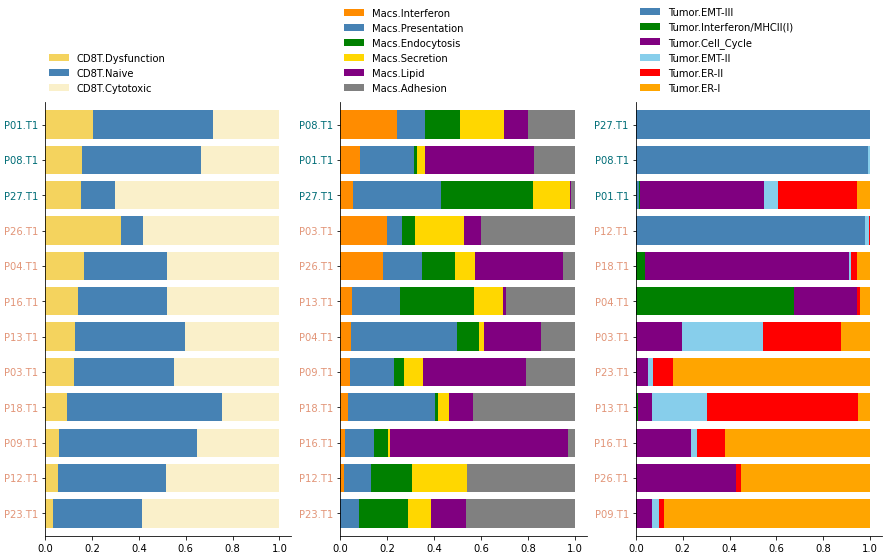

In [33]:
timepoint='Baseline'
# relative abundance 
ra = (pd.crosstab([obs[celltype_col],obs[cellstate_col]],[obs[celltype_col],obs['Sample_Short']]) / obs.groupby([celltype_col])['Sample_Short'].value_counts()).T

# visualization
fig,axs = plt.subplots(1,len(celltype_list),figsize=(5*len(celltype_list),8))
stats_dt = []
for i,celltype in enumerate(celltype_list):
    dt = ra.loc[celltype,celltype]
    dt = dt.loc[dt.index.map(pt_time_map)==timepoint,:]
    ## order by the z score between R vs NR
    ##### stats_result on the distribution of relative abundance of each state
    stats_result = dt.apply(lambda v: pd.Series(ranksums(v[v.index.map(pt_bp_map)=='0-I'], 
                                                             v[v.index.map(pt_bp_map)=='II-III']),
                                                    index=['statstics','Pvalue'],name=v.name)
                                ,axis=0).T
    
#     #### stats on the dominant states
#     from scipy.stats import fisher_exact
#     dt_bi = pd.get_dummies(dt.idxmax(axis=1))
#     stats_result_bi = dt.apply(lambda v: pd.Series(fisher_exact(
#                                                         np.array([
#                                                             [v[v.index.map(pt_bp_map)=='0-I'].sum(),(v[v.index.map(pt_bp_map)=='0-I']==0).sum()],
#                                                             [v[v.index.map(pt_bp_map)=='II-III'].sum(),(v[v.index.map(pt_bp_map)=='II-III']==0).sum()]
#                                                                  ])),
#                                                 index=['statstics','Pvalue'],name=v.name)
#                             ,axis=0).T
#     stats_result['Pvalue_Dominant'] = stats_result_bi['Pvalue']
#     stats_result['statstics_Dominant'] = stats_result_bi['statstics']
    cellstates_order = stats_result.sort_values(['statstics'],ascending=False).index.tolist()
    stats_dt.append(stats_result)
    dt = dt[cellstates_order]
    dt['BestResponse'] = pd.Categorical(dt.index.map(pt_bp_map),['II-III','0-I'],ordered=True)
    dt = dt.sort_values(['BestResponse']+cellstates_order)
    ax =axs[i]
    dt.plot(kind='barh',stacked=True,color=COLOR_PAlETTE['Cellstate'],width=.8,ax=ax)
    ax.legend(loc=(0,1.01),frameon=False)
    ax.set(ylabel='')
    for handle in ax.get_yticklabels():
        pt = handle.get_text()
        handle.set_color(COLOR_PAlETTE['BestResponse'][pt_bpV_map[pt]])
stats_dt = pd.concat(stats_dt,axis=0)
stats_dt['Comparision'] = '0-I - II-III'
stats_dt.sort_values(['Pvalue'])

## Boxplot visualization of significant cell states

Text(0.5, 1.1, 'Malignant cells from baseline samples')

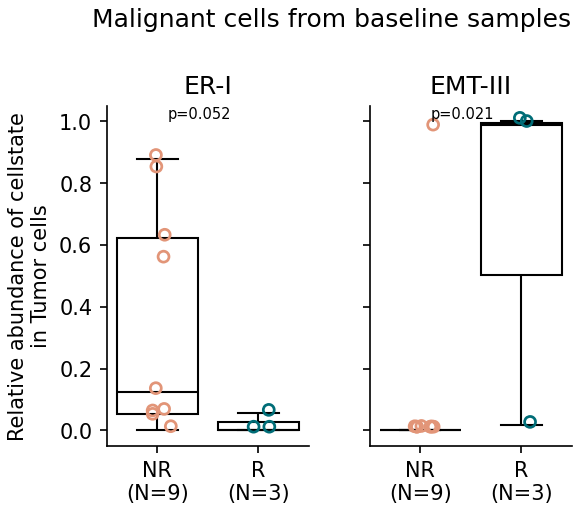

In [50]:
fig,axs = plt.subplots(1,2,figsize=(4,3),sharey=True,dpi=150)
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
filled_marker_style = dict(marker='o', linestyle=':', 
                           color='darkgrey',
                           edgecolor='brown')
ax=axs[0]
celltype='Tumor'
cellstate = 'ER-I'
dt = ra.loc[celltype,celltype]
dt = dt.loc[dt.index.map(pt_time_map)==timepoint,:]
dt['BestResponse'] = pd.Categorical(dt.index.map(pt_bpV_map),['unfavorable response\n(RCB II-III)','favorable response\n(RCB 0-I)'],ordered=True)
dt['RCB'] =  pd.Categorical(dt.index.map(pt_rcb_map),['0','I','II','III'],ordered=True)
sns.stripplot(data=dt,x='BestResponse',y=f'{celltype}.{cellstate}',ax=ax,hue='BestResponse',palette=COLOR_PAlETTE['BestResponse'], marker="$\circ$", size=10)
sns.boxplot(data=dt,x='BestResponse',y=f'{celltype}.{cellstate}',ax=ax,showfliers=False,linewidth=1,**PROPS)
pvalue = stats_dt.loc[f'{celltype}.{cellstate}','Pvalue']
ax.text(0.3,1,s=f"p={pvalue:.3f}",transform = ax.transAxes,va='top',ha='left',size=7)
ax.set(xlabel='',title=cellstate,ylabel=f'Relative abundance of cellstate\nin {celltype} cells');
ax.spines[['right','top']].set_visible(False)
xticklabels = []
for handle in ax.get_xticklabels():
    rcb = handle.get_text()
    text = {'unfavorable response\n(RCB II-III)':'NR','favorable response\n(RCB 0-I)':'R'}[rcb]
    xticklabels.append(f"{text}\n(N={(dt['BestResponse']==rcb).sum()})")
ax.set_xticklabels(xticklabels)
# ax.legend_.remove()
ax=axs[1]
celltype='Tumor'
cellstate = 'EMT-III'
dt = ra.loc[celltype,celltype]
dt = dt.loc[dt.index.map(pt_time_map)==timepoint,:]
dt['BestResponse'] = pd.Categorical(dt.index.map(pt_bpV_map),['unfavorable response\n(RCB II-III)','favorable response\n(RCB 0-I)'],ordered=True)
dt['RCB'] =  pd.Categorical(dt.index.map(pt_rcb_map),['0','I','II','III'],ordered=True)
sns.stripplot(data=dt,x='BestResponse',y=f'{celltype}.{cellstate}',ax=ax,hue='BestResponse',palette=COLOR_PAlETTE['BestResponse'], marker="$\circ$", size=10)
sns.boxplot(data=dt,x='BestResponse',y=f'{celltype}.{cellstate}',ax=ax,showfliers=False,linewidth=1,**PROPS)
pvalue = stats_dt.loc[f'{celltype}.{cellstate}','Pvalue']
ax.text(0.3,1,s=f"p={pvalue:.3f}",transform = ax.transAxes,va='top',ha='left',size=7)
ax.set(xlabel='',title=cellstate,ylabel=f'Relative abundance of cellstate\nin {celltype} cells');
ax.spines[['right','top']].set_visible(False)
xticklabels = []
for handle in ax.get_xticklabels():
    rcb = handle.get_text()
    text = {'unfavorable response\n(RCB II-III)':'NR','favorable response\n(RCB 0-I)':'R'}[rcb]
    xticklabels.append(f"{text}\n(N={(dt['BestResponse']==rcb).sum()})")
ax.set_xticklabels(xticklabels)
# ax.legend(loc=(1.01,0),title='RCB')
plt.subplots_adjust(wspace=.3)
plt.suptitle('Malignant cells from baseline samples',y=1.1)

## Proportion changes of tumor states

In [47]:
clin = obs.drop_duplicates(['Sample_Short']).set_index('Sample_Short')
pt_timepoint = pd.crosstab(clin['Patient'],clin['Timepoint'])
pt_bl_w7d1 = pt_timepoint.index[pt_timepoint[['Baseline','W7D1']].sum(axis=1)==2]
sp_bl_w7d1 = clin.index[clin.Timepoint.isin(['Baseline','W7D1'])&clin.Patient.isin(pt_bl_w7d1)]

<AxesSubplot:xlabel='Timepoint', ylabel='Tumor.EMT-III'>

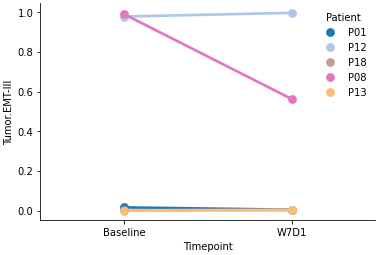

In [52]:
celltype='Tumor'
cellstate = 'EMT-III'
dt = ra.loc[celltype,celltype].loc[sp_bl_w7d1,f"{celltype}.{cellstate}"].to_frame()
dt['Patient'] = dt.index.map(clin['Patient'].to_dict())
dt['Timepoint'] = dt.index.map(clin['Timepoint'].to_dict())
sns.pointplot(data=dt,x='Timepoint',y=f"{celltype}.{cellstate}",hue="Patient",palette=COLOR_PAlETTE['Patient'])

<AxesSubplot:xlabel='Timepoint', ylabel='Tumor.ER-I'>

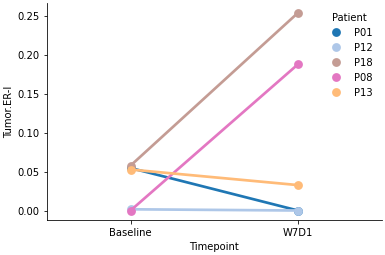

In [55]:
cellstate = 'ER-I'
dt = ra.loc[celltype,celltype].loc[sp_bl_w7d1,f"{celltype}.{cellstate}"].to_frame()
dt['Patient'] = dt.index.map(clin['Patient'].to_dict())
dt['Timepoint'] = dt.index.map(clin['Timepoint'].to_dict())
sns.pointplot(data=dt,x='Timepoint',y=f"{celltype}.{cellstate}",hue="Patient",palette=COLOR_PAlETTE['Patient'])

# Cell states preditive power test on W7D1 samples

,statstics,Pvalue,Comparision
Cellstate,,,
Tumor.EMT-II,1.732051,0.083265,0-I - II-III
Tumor.Interferon/MHCII(I),-1.732051,0.083265,0-I - II-III
CD8T.Naive,-1.154701,0.248213,0-I - II-III
Macs.Presentation,-1.154701,0.248213,0-I - II-III
CD8T.Cytotoxic,0.866025,0.386476,0-I - II-III
CD8T.Dysfunction,-0.577350,0.563703,0-I - II-III
Macs.Adhesion,-0.577350,0.563703,0-I - II-III
Macs.Endocytosis,0.577350,0.563703,0-I - II-III
Macs.Interferon,-0.577350,0.563703,0-I - II-III


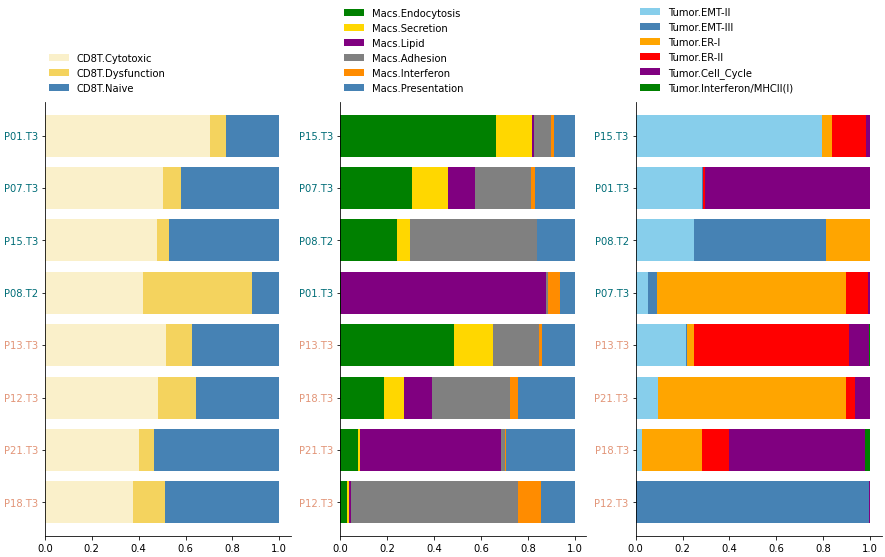

In [18]:
timepoint='W7D1'
# relative abundance 
ra = (pd.crosstab([obs[celltype_col],obs[cellstate_col]],[obs[celltype_col],obs['Sample_Short']]) / obs.groupby([celltype_col])['Sample_Short'].value_counts()).T

# visualization
fig,axs = plt.subplots(1,len(celltype_list),figsize=(5*len(celltype_list),8))
stats_dt = []
for i,celltype in enumerate(celltype_list):
    dt = ra.loc[celltype,celltype]
    dt = dt.loc[dt.index.map(pt_time_map)==timepoint,:]
    ## order by the z score between R vs NR
    ##### stats_result on the distribution of relative abundance of each state
    stats_result = dt.apply(lambda v: pd.Series(ranksums(v[v.index.map(pt_bp_map)=='0-I'], 
                                                             v[v.index.map(pt_bp_map)=='II-III']),
                                                    index=['statstics','Pvalue'],name=v.name)
                                ,axis=0).T
    
#     #### stats on the dominant states
#     from scipy.stats import fisher_exact
#     dt_bi = pd.get_dummies(dt.idxmax(axis=1))
#     stats_result_bi = dt.apply(lambda v: pd.Series(fisher_exact(
#                                                         np.array([
#                                                             [v[v.index.map(pt_bp_map)=='0-I'].sum(),(v[v.index.map(pt_bp_map)=='0-I']==0).sum()],
#                                                             [v[v.index.map(pt_bp_map)=='II-III'].sum(),(v[v.index.map(pt_bp_map)=='II-III']==0).sum()]
#                                                                  ])),
#                                                 index=['statstics','Pvalue'],name=v.name)
#                             ,axis=0).T
#     stats_result['Pvalue_Dominant'] = stats_result_bi['Pvalue']
#     stats_result['statstics_Dominant'] = stats_result_bi['statstics']
    cellstates_order = stats_result.sort_values(['statstics'],ascending=False).index.tolist()
    stats_dt.append(stats_result)
    dt = dt[cellstates_order]
    dt['BestResponse'] = pd.Categorical(dt.index.map(pt_bp_map),['II-III','0-I'],ordered=True)
    dt = dt.sort_values(['BestResponse']+cellstates_order)
    ax =axs[i]
    dt.plot(kind='barh',stacked=True,color=COLOR_PAlETTE['Cellstate'],width=.8,ax=ax)
    ax.legend(loc=(0,1.01),frameon=False)
    ax.set(ylabel='')
    for handle in ax.get_yticklabels():
        pt = handle.get_text()
        handle.set_color(COLOR_PAlETTE['BestResponse'][pt_bp_map[pt]])
stats_dt = pd.concat(stats_dt,axis=0)
stats_dt['Comparision'] = '0-I - II-III'
stats_dt.sort_values(['Pvalue'])

## Boxplot visualization of significant cell states

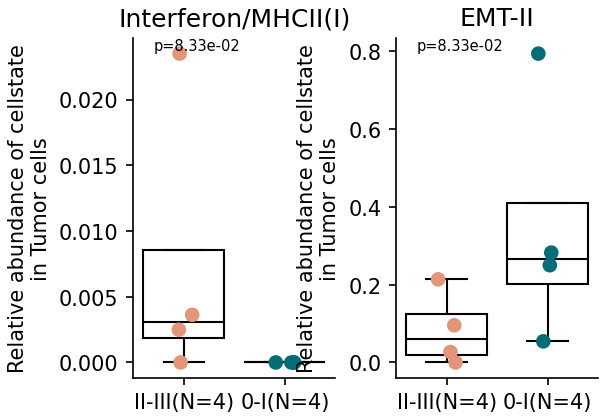

In [21]:
fig,axs = plt.subplots(1,2,figsize=(4,3),sharey=False,dpi=150)
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

ax=axs[0]
celltype='Tumor'
cellstate = 'Interferon/MHCII(I)'
dt = ra.loc[celltype,celltype]
dt = dt.loc[dt.index.map(pt_time_map)==timepoint,:]
dt['BestResponse'] = pd.Categorical(dt.index.map(pt_bp_map),['II-III','0-I'],ordered=True)
sns.stripplot(data=dt,x='BestResponse',y=f'{celltype}.{cellstate}',ax=ax,palette=COLOR_PAlETTE['BestResponse'],size=7)
sns.boxplot(data=dt,x='BestResponse',y=f'{celltype}.{cellstate}',ax=ax,showfliers=False,linewidth=1,**PROPS)
pvalue = stats_dt.loc[f'{celltype}.{cellstate}','Pvalue']
ax.text(0.1,1,s=f"p={pvalue:.2e}",transform = ax.transAxes,va='top',ha='left',size=7)
ax.set(xlabel='',title=cellstate,ylabel=f'Relative abundance of cellstate\nin {celltype} cells');
ax.spines[['right','top']].set_visible(False)
xticklabels = []
for handle in ax.get_xticklabels():
    rcb = handle.get_text()
    xticklabels.append(f"{rcb}(N={(dt['BestResponse']==rcb).sum()})")
ax.set_xticklabels(xticklabels)
        
ax=axs[1]
celltype='Tumor'
cellstate = 'EMT-II'
dt = ra.loc[celltype,celltype]
dt = dt.loc[dt.index.map(pt_time_map)==timepoint,:]
dt['BestResponse'] = pd.Categorical(dt.index.map(pt_bp_map),['II-III','0-I'],ordered=True)
sns.stripplot(data=dt,x='BestResponse',y=f'{celltype}.{cellstate}',ax=ax,palette=COLOR_PAlETTE['BestResponse'],size=7)
sns.boxplot(data=dt,x='BestResponse',y=f'{celltype}.{cellstate}',ax=ax,showfliers=False,linewidth=1,**PROPS)
pvalue = stats_dt.loc[f'{celltype}.{cellstate}','Pvalue']
ax.text(0.1,1,s=f"p={pvalue:.2e}",transform = ax.transAxes,va='top',ha='left',size=7)
ax.set(xlabel='',title=cellstate,ylabel=f'Relative abundance of cellstate\nin {celltype} cells');
ax.spines[['right','top']].set_visible(False)
xticklabels = []
for handle in ax.get_xticklabels():
    rcb = handle.get_text()
    xticklabels.append(f"{rcb}(N={(dt['BestResponse']==rcb).sum()})")
ax.set_xticklabels(xticklabels)

plt.subplots_adjust(wspace=.3)